In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['iwildfastaibaseline', 'iwildcam-2019-fgvc6']


In [2]:
! ls

__notebook__.ipynb  __output__.json


In [3]:
import warnings
warnings.filterwarnings("ignore")
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
from fastai.vision import *

In [5]:
PATH = Path("../input/iwildcam-2019-fgvc6")

In [6]:
df = pd.read_csv(PATH/"train.csv")

In [7]:
len(df)

196299

In [8]:
is_animal = df.category_id > 0 #removing null class from dataset

In [9]:
new_class = is_animal.values.astype(int)

In [10]:
train_df = df[["category_id", "file_name"]]

In [11]:
train_df["label"] = new_class

In [12]:
train_df.tail()

,category_id,file_name,label
196294,0,597b495c-23d2-11e8-a6a3-ec086b02610b.jpg,0
196295,0,594e7621-23d2-11e8-a6a3-ec086b02610b.jpg,0
196296,4,596d6468-23d2-11e8-a6a3-ec086b02610b.jpg,1
196297,0,58f5b062-23d2-11e8-a6a3-ec086b02610b.jpg,0
196298,0,589e668f-23d2-11e8-a6a3-ec086b02610b.jpg,0


In [13]:
train_df_final = train_df[["file_name","label"]]

In [14]:
train_df_final.columns = ['name', 'label']

In [15]:
train_df_final.head()

,name,label
0,5998cfa4-23d2-11e8-a6a3-ec086b02610b.jpg,1
1,588a679f-23d2-11e8-a6a3-ec086b02610b.jpg,1
2,59279ce3-23d2-11e8-a6a3-ec086b02610b.jpg,0
3,5a2af4ab-23d2-11e8-a6a3-ec086b02610b.jpg,0
4,599fbd89-23d2-11e8-a6a3-ec086b02610b.jpg,0


In [16]:
data = ImageDataBunch.from_df(PATH, train_df_final, "train_images", size=448, bs=128)

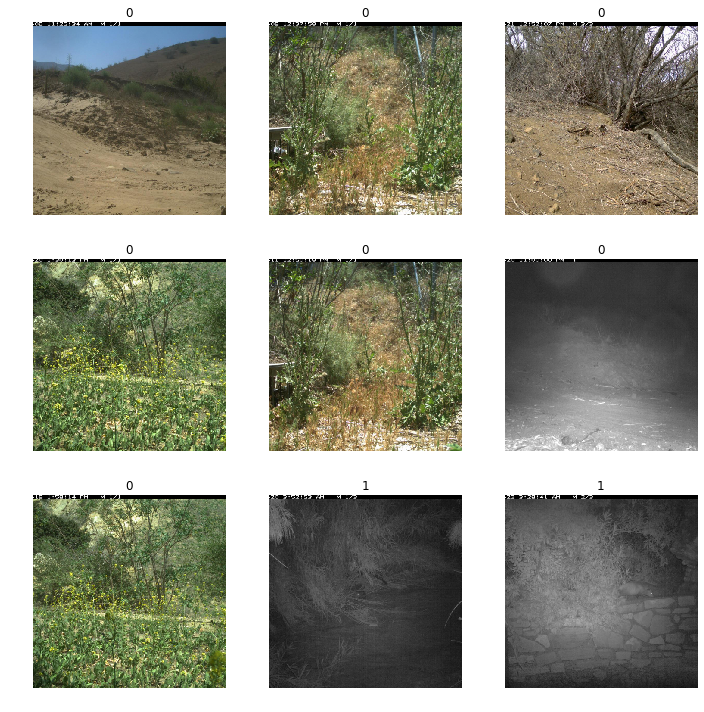

In [17]:
data.show_batch(rows=3, figsize=(10,10))

In [18]:
from fastai.metrics import error_rate, accuracy
from fastai.vision import models 
from fastai.vision import learner

In [19]:
learn = learner.create_cnn(data, models.resnet34, metrics=[error_rate,accuracy], model_dir='/tmp/models').to_fp16() 

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /tmp/.torch/models/resnet34-333f7ec4.pth
87306240it [00:01, 69883540.13it/s]


In [20]:
# learn.lr_find()

In [21]:
# learn.recorder.plot()

In [22]:
learn.fit_one_cycle(3, 1e-2)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.110826,0.108192,0.042818,0.957182,1:46:55
1,0.085589,0.090141,0.037418,0.962582,1:46:50


## Train Predictions

In [23]:
# from fastai.vision import ImageImageList
# test_data = ImageImageList.from_df(df, PATH/"train_images", cols="file_name")
# learn.data.add_test(test_data)

In [24]:
# preds, y = learn.get_preds(ds_type=DatasetType.Test)
# np.save("is_animal_train-res50", preds)

## Test Predictions

In [25]:
from fastai.vision import ImageImageList
df_test = pd.read_csv(PATH/"test.csv")
test_data = ImageImageList.from_df(df_test, PATH/'test_images', cols="file_name")
learn.data.add_test(test_data)
preds, y = learn.get_preds(ds_type=DatasetType.Test)
np.save("test-is-animal-res50", preds)
